# #MeToo movement

## Importing, reading and cleaning data

**Dataset source** : https://data.world/rdeeds/350k-metoo-tweets

**Content** : about 380'000 tweets under the #MeToo hashtag dated between October 30th 2017 and February 8th 2018.

In [20]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.simplefilter('ignore')

In [24]:
import numpy as np
import pandas as pd
import scipy as sp
from pandas import ExcelWriter # to write csv file
from pandas import ExcelFile # to read csv file
import json
import pylab # to plot figures
from scipy import stats # for statistics
import matplotlib.pyplot as plt # to plot figures
import matplotlib.dates as mdates # date type
import collections # to find the most common words and count the number of occurences
from nltk.corpus import stopwords # list of stopwords
import re # regular expression to treat text
from wordcloud import WordCloud, STOPWORDS # to display word clouds
from PIL import Image
import glob
import mpld3
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
from datetime import datetime
from datetime import date
import spacy
from spacy.lang.en import English
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import random
import ipywidgets as widgets
import gensim
from gensim import corpora
import pickle
#import genderperformr as gp
import matplotlib.pyplot as plt
import re
import csv
import chardet
from collections import Counter
from collections import defaultdict
import matplotlib.dates as mdates # date type
%matplotlib inline
plotly.tools.set_credentials_file(username='lolovanco', api_key='giwgJKuoiHjs0ebr80op')
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\art34\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
tweets = pd.read_csv('metootweets.csv', error_bad_lines=False, warn_bad_lines=False, encoding='ascii')

In [26]:
tweets.head()

,id,insertdate,twitterhandle,followers,hashtagsearched,tweetid,dateoftweet,text,lastcontactdate,lasttimelinepull,lasttimetweetsanalyzed,numberoftweetsanalysed,numberoftweetsabouthash,actualtwitterdate
0,2365116,2018-02-08 16:38:00,comsatori,7216,metoo,961730576167288832,Thu Feb 08 22:36:52 +0000 2018,RT @IxAmandaDelgado: @Navegaciones @FelipeCald...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN
1,2365115,2018-02-08 16:38:00,mchris4duke,9661,metoo,961730578398830592,Thu Feb 08 22:36:52 +0000 2018,RT @alexwitze: .@NSF will require institutions...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN
2,2365114,2018-02-08 16:38:00,munakk,10,metoo,961730610824871936,Thu Feb 08 22:37:00 +0000 2018,Listening to the awesome feminist scholar Cynt...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN
3,2365113,2018-02-08 16:38:00,masayakondo,1487,metoo,961730619393810432,Thu Feb 08 22:37:02 +0000 2018,??????????????????????????????????????????????...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN
4,2365112,2018-02-08 16:38:00,eddydur,33,metoo,961730655506915328,Thu Feb 08 22:37:11 +0000 2018,"RT @AlbertoBernalLe: ?A ver, donde est?n todas...",2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN


In [29]:
# converting the IDs to numeric values
tweets.id=pd.to_numeric(tweets.id, errors='coerce', downcast='integer')

In [30]:
# throwing all the entries where the ID cannot be converted to a numeric value
tweets=tweets[~np.isnan(tweets.id)]

In [31]:
# checking how many samples we loose
len(tweets)

382497

# Raw textual analysis

In this section, we will analyze the raw text of the tweets. The main topics will be identified using a wordcloud, a list of the most common words, and a list of the most common hashtags. We will also use Latent Dirichlet Allocation (LDA) to perform topic clustering and thus identify some important subgroups of debates/topics.

## Proportion of tweets containing #metoo

Let's check if the #MeToo is present in each tweet.

In [16]:
# extracting the tweets containing "#metoo" and showing the proportion
tweets['lower text'] = tweets['text'].str.lower()
val = tweets['lower text'].str.contains('#metoo', case=False).value_counts()
print('Proportion :',(val[1]/(tweets.shape[0]))*100,'%')
val

Proportion : 54.796508207907515 %


True     209595
False    172897
Name: lower text, dtype: int64

Hence, half of our samples do not contain #metoo. Indeed, the author of the dataset says : "I use python and sql to hit twitter's api and search for different hashtags. Metoo was one of them". So #metoo was not the only the target hashtag, but more globally all the hashtags associated with the movement.

## Most frequent words

Below we extract the most frequent words appearing in the tweets.

In [17]:
# converting the tweet text to a string type
tweets['text'] = tweets['text'].astype(str)

In [36]:
# removing the punctuation and some frequent meaningless words
tweets['text_without_stopwords'] = tweets['text']
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('?','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('.','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace(',','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace(':','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace(';','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace("''",'')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('-','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('#','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.lower()
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('nan','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('rt','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('#metoo','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('metoo','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('&amp','')

# removing stopwords
stop_en = stopwords.words('english')
stop_sp = stopwords.words('spanish')
stop_fr = stopwords.words('french')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop_sp)]))
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop_fr)]))
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop_en)]))

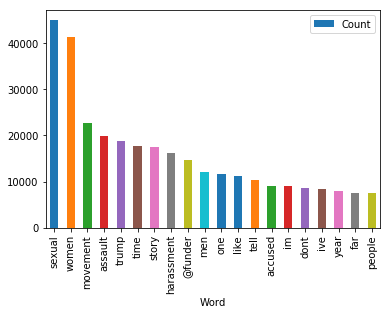

In [22]:
# showing the 20 most common and meaningful (!) words as a bar plot
lst = collections.Counter(" ".join(tweets["text_without_stopwords"]).lower().split()).most_common(20)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')
plt.show()

In [23]:
# showing the 40 most common and meaningful words as a list
collections.Counter(" ".join(tweets["text_without_stopwords"]).lower().split()).most_common(40)

[('sexual', 44970),
 ('women', 41309),
 ('movement', 22750),
 ('assault', 19817),
 ('trump', 18845),
 ('time', 17614),
 ('story', 17494),
 ('harassment', 16209),
 ('@funder', 14713),
 ('men', 12153),
 ('one', 11702),
 ('like', 11133),
 ('tell', 10393),
 ('accused', 9108),
 ('im', 9056),
 ('dont', 8694),
 ('ive', 8331),
 ('year', 8039),
 ('far', 7603),
 ('people', 7584),
 ('woman', 7449),
 ('@alyssa_milano', 7448),
 ('share', 7035),
 ('timesup', 6874),
 ('say', 6749),
 ('donald', 6686),
 ('decided', 6496),
 ('us', 6351),
 ('@leeanntweeden', 6253),
 ('stories', 6091),
 ('https//tco/tqtgfvzkzg', 6073),
 ('victims', 5980),
 ('sexually', 5924),
 ('abuse', 5919),
 ('person', 5807),
 ('everyone', 5789),
 ('new', 5770),
 ('years', 5721),
 ('see', 5612),
 ('know', 5608)]

## Word cloud

We can also explore the main keywords using a word cloud.

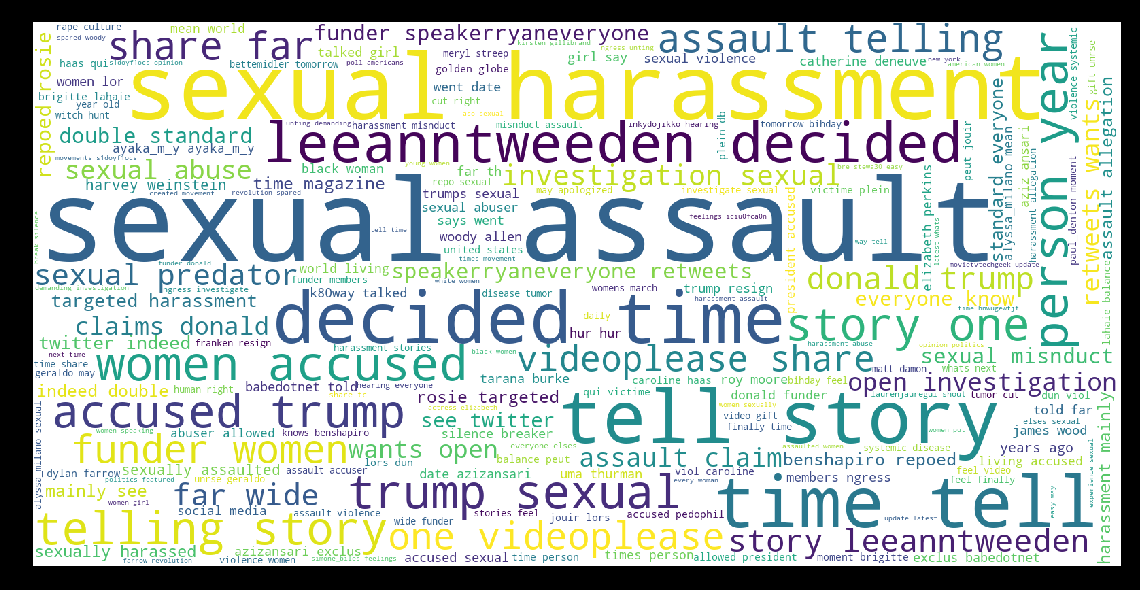

In [24]:
# displaying a word cloud of the most common words (group of words) in our tweets

# function to display the wordcloud
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,width=1600, height=800).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("#metoo")

# removing meaningless words
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('https','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('co','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('ive','')
tweets['text_without_stopwords'] = tweets['text_without_stopwords'].str.replace('tqtgfvzkzg','')
wordcloud(tweets,'text_without_stopwords')  

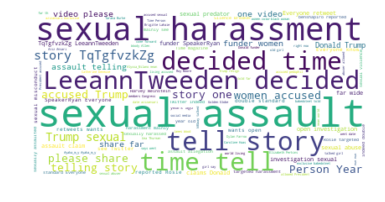

In [25]:
text = " ".join(review for review in tweets.text)

my_stopwords = set(STOPWORDS)
my_stopwords.update(stopwords.words('french'))
my_stopwords.update(stopwords.words('spanish'))
my_stopwords.update(["https","co","RT","MeToo","ve","amp"])

wordcloud = WordCloud(stopwords=my_stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's give a better shape to this word cloud...

In [26]:
text = re.sub(r"http\S+", "", text)
text = re.sub(r"@\S+", "", text)
text = re.sub(r"#\S+", "", text)

In [27]:
def transform_format(val):
    if val == 255:
        return 0
    else:
        return 255

In [28]:
def shape_wordcloud(mask,text,output_name):
    transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

    for i in range(len(mask)):
        transformed_mask[i] = list(map(transform_format, mask[i]))
    
        my_stopwords = set(STOPWORDS)
        my_stopwords.update(stopwords.words('french'))
        my_stopwords.update(stopwords.words('spanish'))
        my_stopwords.update(["https","co","RT","MeToo","ve","amp","re"])
    
    # Create a word cloud image
    wc = WordCloud(background_color="white", max_words=200, mask=transformed_mask,
                   stopwords=my_stopwords, contour_width=0, contour_color='firebrick')

    # Generate a wordcloud
    wc.generate(text)

    # store to file
    wc.to_file(output_name)

    # show
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

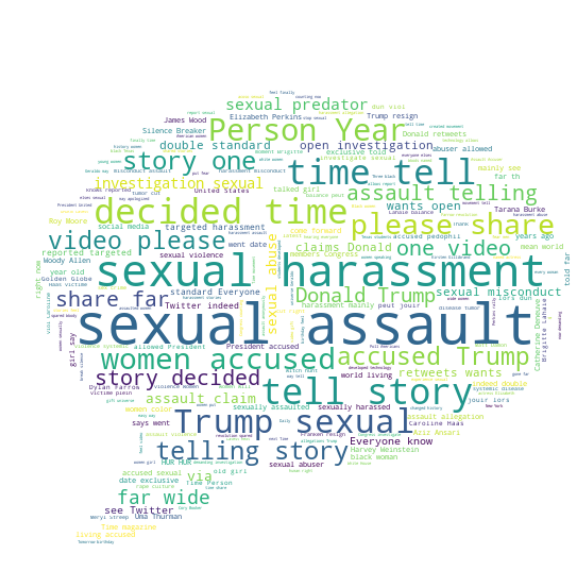

In [29]:
bubble_mask = np.array(Image.open("bubble_mask.png"))
shape_wordcloud(bubble_mask,text,"bubble_cloud.png")

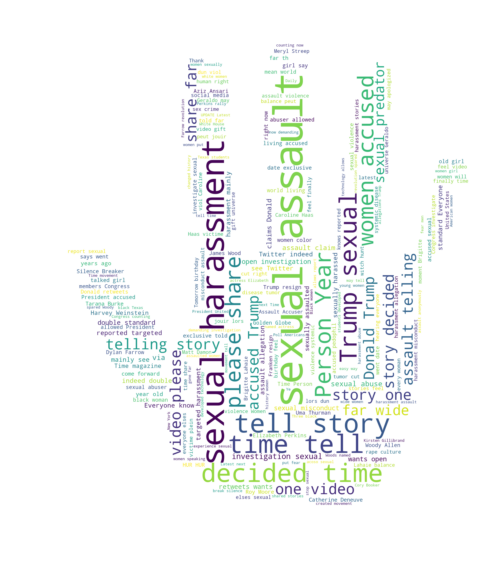

In [30]:
stop_mask = np.array(Image.open("stop_mask.png"))
shape_wordcloud(stop_mask,text,"stop_cloud.png")

## Interaction analysis

Here, we will explore the links between the different users, by using statistics about retweets, replies, and mentions.

### Number of followers

Let's show the distribution of the number of followers, using a histogram. Therefore we will use the column *followers* that contains the number of followers associated with each user.

In [43]:
# converting the column representing the distribution of the number of followers to a numeric type
tweets['followers']=pd.to_numeric(tweets['followers'],errors='coerce')
tweets.head()

,id,insertdate,twitterhandle,followers,hashtagsearched,tweetid,dateoftweet,text,lastcontactdate,lasttimelinepull,...,numberoftweetsanalysed,numberoftweetsabouthash,actualtwitterdate,month,YearMonth,day,YearMonthDay,lower text,text_without_stopwords,text lower
0,2365116.0,2018-02-08 16:38:00,comsatori,7216.0,metoo,961730576167288832,2018-02-08 22:36:52,RT @IxAmandaDelgado: @Navegaciones @FelipeCald...,2015-01-01 00:00:00,2015-01-01 00:00:00,...,0,0,NaN,2.0,2018-2,8.0,2018-02-08,rt @ixamandadelgado: @navegaciones @felipecald...,@ixamandadelgado @navegaciones @felipecalderon...,rt @ixamandadelgado: @navegaciones @felipecald...
1,2365115.0,2018-02-08 16:38:00,mchris4duke,9661.0,metoo,961730578398830592,2018-02-08 22:36:52,RT @alexwitze: .@NSF will require institutions...,2015-01-01 00:00:00,2015-01-01 00:00:00,...,0,0,NaN,2.0,2018-2,8.0,2018-02-08,rt @alexwitze: .@nsf will require institutions...,@alexwitze @nsf require institutions rece gran...,rt @alexwitze: .@nsf will require institutions...
2,2365114.0,2018-02-08 16:38:00,munakk,10.0,metoo,961730610824871936,2018-02-08 22:37:00,Listening to the awesome feminist scholar Cynt...,2015-01-01 00:00:00,2015-01-01 00:00:00,...,0,0,NaN,2.0,2018-2,8.0,2018-02-08,listening to the awesome feminist scholar cynt...,listening awesome feminist scholar cynthia enl...,listening to the awesome feminist scholar cynt...
3,2365113.0,2018-02-08 16:38:00,masayakondo,1487.0,metoo,961730619393810432,2018-02-08 22:37:02,??????????????????????????????????????????????...,2015-01-01 00:00:00,2015-01-01 00:00:00,...,0,0,NaN,2.0,2018-2,8.0,2018-02-08,??????????????????????????????????????????????...,//t/gwawglka36,??????????????????????????????????????????????...
4,2365112.0,2018-02-08 16:38:00,eddydur,33.0,metoo,961730655506915328,2018-02-08 22:37:11,"RT @AlbertoBernalLe: ?A ver, donde est?n todas...",2015-01-01 00:00:00,2015-01-01 00:00:00,...,0,0,NaN,2.0,2018-2,8.0,2018-02-08,"rt @albertobernalle: ?a ver, donde est?n todas...",@albeobernalle ver estn todas voceras lombiana...,"rt @albertobernalle: ?a ver, donde est?n todas..."


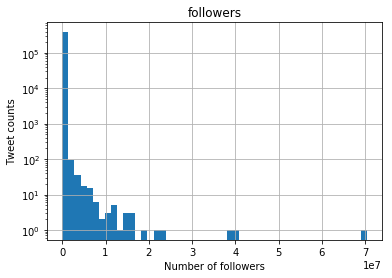

In [44]:
# plotting a histogram representing the number of followers
tweets.hist(column='followers',bins=50,log=True)
plt.xlabel('Number of followers')
plt.ylabel('Tweet counts')
plt.show()

### Retweets (beginning with "RT")

#### Propotion of retweets 

Let's compute the proportion of retweets among all the tweets.

In [45]:
# extracting the retweets (tweets begining with "RT") and showing the proportion of retweets
tweets_rt = tweets.copy()
tweets_rt = tweets_rt[tweets_rt['text'].apply(lambda x: (x.startswith('RT')))]
print(len(tweets_rt),'retweets over',len(tweets),'tweets (i.e.',len(tweets_rt)/len(tweets)*100,'%)')
tweets_rt[['text']].head(20)      

280860 retweets over 382497 tweets (i.e. 73.42802688648538 %)


,text
0,RT @IxAmandaDelgado: @Navegaciones @FelipeCald...
1,RT @alexwitze: .@NSF will require institutions...
4,"RT @AlbertoBernalLe: ?A ver, donde est?n todas..."
5,RT @sassysanborn: We cant romanticize the same...
6,RT @DefendEvropa: #120dB is a new initiative b...
7,RT @sarnjitflora: Very proud to become a White...
10,RT @JustinVerlander: Couldnt be more proud of ...
11,RT @JamisonSteeve: As part of our focus on dem...
13,"RT @johnwhilley: Presidents, Posts and liberal..."
14,"RT @AlbertoBernalLe: ?A ver, donde est?n todas..."


#### Most popular retweets

Here we display the most retweeted publications.

In [46]:
# showing the most popular retweets
pd.set_option('display.max_colwidth', -1)
popular_rt = tweets['text'].value_counts()
df = popular_rt.rename_axis('text').reset_index(name='counts')
df = df.drop(df.index[0])
df

,text,counts
1,RT @Ayaka_m_y: ?????????????????????????????????????????????????????????????????????????????????\n???????????????????????????????????????????,4474
2,RT @funder: The 16 women who accused Trump of sexual assault are telling their story in one video-please share this far &amp; wide. RT if you a?,3632
3,RT @funder: .@SpeakerRyan-Everyone who retweets this wants you to open up an investigation into the 20 sexual assault claims against Donald?,2393
4,"RT @benshapiro: Just reported @Rosie for targeted harassment, mainly to see if Twitter does indeed have a double standard. Everyone knows i?",2167
5,RT @ha_chu: ????????????????????????????????????????????????????????????????????????? #metoo ???????????????????????????????????????????????,1758
6,"RT @k80way: I talked to a girl who says she went on a date with @azizansari in an exclusive for @babedotnet. She told me, It was by far th?""",1318
7,RT @biancajyojyoen: ???? #MeToo? ???????????????????????????????????????????????????????????????????????????????????????????????????????????,1312
8,"RT @Alyssa_Milano: I mean, what world are we living in that an accused sexual abuser is allowed to be our President and an accused pedophil?",1125
9,"RT @Seol_GuGu: ?? ??? ???"" ?? ????? ??? ???? ??? ""??"" ?? ???. ??? ???? ????",1097
10,RT @Ereike_Sparse: #MeToo \n????????????????????????????????????????\n?????????????????????????????H??????????????????????????????????????????,1050


### Replies (beginning with "@")

#### Most popular replies

Let's compute the proportion of replies among all the tweets.

In [47]:
# extracting the replies (tweets begining with "@") and showing the proportion of replies
tweets_at = tweets.copy()
tweets_at = tweets_at[tweets_at['text'].apply(lambda x: (x.startswith('@')))]
print(len(tweets_at),'replies over',len(tweets),'tweets (i.e.',len(tweets_at)/len(tweets)*100,'%)')
tweets_at[['text']].head(20)      

26078 replies over 382497 tweets (i.e. 6.81783125096406 %)


,text
9,@DianeMariePosts @kwralex @gmbutts #GeraldButts is #JustinTrudeau &amp; #Liberals &lt;CHIEF ADVISOR&gt; in #Canada? https://t.co/nazXlN7y1k
15,@paulinaporizkov Gotta love the hypocrisy of a woman who marginalizes herself and her gender while at the same time? https://t.co/045sTU9tXC
36,"@ZynerbaPharma, More than disappointed with mgmt. upgrades by 5th tier banks is obv $ZYNE readying secondary, dilut? https://t.co/rlCffddqqT"
39,@chelseahandler I heard you and Harvey are BFFS \n#MeToo #maga https://t.co/pPkNjyDBua
45,@SILVER67GK @xbabybird @babybirdrip #metoo
69,@cmclymer I?ve personally always thought #MeToo was bullshit
75,@keck1157 @graceisnotgiven @xtprmike @akteddybear1 @ZacharyBONESTE1 @NewKrash @Thomas_Fagan @lesliebialler? https://t.co/fgFeUhr7Nb
78,@publicsenat @metoo_paris
114,@ringding805 Metoo
131,@matthew_schott The most amazing thing he noted was the fact that he could have helped break some of the #MeToo stu? https://t.co/WZlEpQ1zvP


In [48]:
# extracting the tweets that are either a simple reply or a retweeted reply (tweets begining with "@" or "RT @") 
# and showing the proportion
tweets_at = tweets.copy()
tweets_at = tweets_at[tweets_at['text'].apply(lambda x: (x.startswith('@')) | (x.startswith('RT @')))]
print(len(tweets_at),'[RT + reply] over',len(tweets),'tweets (i.e.',len(tweets_at)/len(tweets)*100,'%)')
tweets_at[['text']].head(20)      

306797 [RT + reply] over 382497 tweets (i.e. 80.20899510322957 %)


,text
0,RT @IxAmandaDelgado: @Navegaciones @FelipeCalderon @comsatori Cuando esta se?ora habla es como leer los twits de Ivanka Trump con el HT #Me?
1,"RT @alexwitze: .@NSF will require institutions that receive grant funds to tell them if PIs, co-PIs or anyone on the grant is found to have?"
4,"RT @AlbertoBernalLe: ?A ver, donde est?n todas las voceras colombianas del #MeToo? ?No van a decir nada ante esto? ?De verdad se van a qued?"
5,"RT @sassysanborn: We cant romanticize the same things we rally against. We cant have it both ways. Theres No Room for Fifty Shades"" in?"""
6,"RT @DefendEvropa: #120dB is a new initiative by a group of German women who refuse to stay silent about migrant rape, violence and terroris?"
7,RT @sarnjitflora: Very proud to become a White Ribbon UK Champion and to be keeping my affiliation with White Ribbon AUS over here in the U?
9,@DianeMariePosts @kwralex @gmbutts #GeraldButts is #JustinTrudeau &amp; #Liberals &lt;CHIEF ADVISOR&gt; in #Canada? https://t.co/nazXlN7y1k
10,RT @JustinVerlander: Couldnt be more proud of @KateUpton. I know this difficult decision to tell her story is to empower others in similar?
11,"RT @JamisonSteeve: As part of our focus on democracy in our #shiftdisturbers series this year, we are proud to have upcoming talks on #MeTo?"
13,"RT @johnwhilley: Presidents, Posts and liberal pandering to power\nhttps://t.co/I8zAoB9KwJ \n#Trump #Obama #HillaryClinton #piersmorgan #BBC?"


### Mentions (containing "@")

#### Proportion of mentions

Let's compute the proportion of mentions among all the tweets.

In [49]:
# extracting mentions (tweets containing "@") and showing the proportion of mentions
tweets_me = tweets.copy()
tweets_me = tweets_me[tweets_me['text'].str.contains('@')]
print(len(tweets_me),'mentions (@) over',len(tweets),'tweets (i.e.',len(tweets_me)/len(tweets)*100,'%)')
tweets_me[['text']].head(20)      

319930 mentions (@) over 382497 tweets (i.e. 83.64248608485818 %)


,text
0,RT @IxAmandaDelgado: @Navegaciones @FelipeCalderon @comsatori Cuando esta se?ora habla es como leer los twits de Ivanka Trump con el HT #Me?
1,"RT @alexwitze: .@NSF will require institutions that receive grant funds to tell them if PIs, co-PIs or anyone on the grant is found to have?"
4,"RT @AlbertoBernalLe: ?A ver, donde est?n todas las voceras colombianas del #MeToo? ?No van a decir nada ante esto? ?De verdad se van a qued?"
5,"RT @sassysanborn: We cant romanticize the same things we rally against. We cant have it both ways. Theres No Room for Fifty Shades"" in?"""
6,"RT @DefendEvropa: #120dB is a new initiative by a group of German women who refuse to stay silent about migrant rape, violence and terroris?"
7,RT @sarnjitflora: Very proud to become a White Ribbon UK Champion and to be keeping my affiliation with White Ribbon AUS over here in the U?
9,@DianeMariePosts @kwralex @gmbutts #GeraldButts is #JustinTrudeau &amp; #Liberals &lt;CHIEF ADVISOR&gt; in #Canada? https://t.co/nazXlN7y1k
10,RT @JustinVerlander: Couldnt be more proud of @KateUpton. I know this difficult decision to tell her story is to empower others in similar?
11,"RT @JamisonSteeve: As part of our focus on democracy in our #shiftdisturbers series this year, we are proud to have upcoming talks on #MeTo?"
13,"RT @johnwhilley: Presidents, Posts and liberal pandering to power\nhttps://t.co/I8zAoB9KwJ \n#Trump #Obama #HillaryClinton #piersmorgan #BBC?"


#### Most popular mentions

Here we display the users the most frequently mentionned.

In [50]:
# showing the most popular mentions

tweets['text'] = tweets['text'].str.replace(r'\r', ' ')
hashtag = tweets[['id','text']]

# extracting the hastags
hashtags_extracted = hashtag['text'].str.extractall('(?P<hashtag>@\w+)')
hashtags_extracted = hashtags_extracted.reset_index(level=1)
hashtags_extracted = hashtags_extracted.join(hashtag['id'])

hashtags_extracted = hashtags_extracted[['id', 'hashtag']]

# merging the tweets and the hashtag list
hashtag = pd.merge(hashtag, hashtags_extracted, how='right', on='id')

# couting the number of occurences for each hashtag
hashtag['hashtag'].value_counts().head(50)

@funder             14714
@Alyssa_Milano      7458 
@LeeannTweeden      6249 
@realDonaldTrump    5237 
@Ayaka_m_y          4873 
@SpeakerRyan        3412 
@benshapiro         2810 
@DaShanneStokes     2589 
@Rosie              2558 
@account_kkojima    2223 
@TIME               2113 
@ha_chu             2105 
@TaranaBurke        2070 
@movietvtechgeek    1800 
@azizansari         1683 
@Oprah              1487 
@CHSommers          1484 
@babedotnet         1410 
@k80way             1397 
@syeddoha           1341 
@BFJNews            1324 
@biancajyojyoen     1313 
@YouTube            1183 
@nytimes            1179 
@rikashiikiamf      1178 
@goldengateblond    1132 
@rosemcgowan        1127 
@AynRandPaulRyan    1109 
@Seol_GuGu          1097 
@SenGillibrand      1073 
@Ereike_Sparse      1052 
@paul_denton        1033 
@umekichkun         1030 
@POTUS              926  
@CNN                921  
@mmpadellan         900  
@keicos0715         889  
@BetteMidler        874  
@ArianeBella

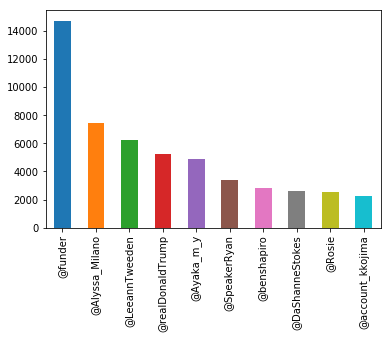

In [51]:
# showing the most common users to whom one replies
hashtag['hashtag'].value_counts().head(10).plot('bar')
plt.show()

## Topic modeling/clustering

In [32]:
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            continue
        elif token.orth_.startswith('@'):
            continue
        elif token.orth_.startswith('metoo'):
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [33]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\art34\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\art34\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def prepare_text_for_lda(text):
    if isinstance(text,str):
        tokens = tokenize(text)
        tokens = [token for token in tokens if isinstance(token, str)]
        tokens = [token for token in tokens if len(token) > 4]
        tokens = [token for token in tokens if token not in en_stop]
        tokens = [get_lemma(token) for token in tokens]
    else:
        tokens = ""
    return tokens

In [36]:
# long to run

text_data = []
tweets_list = tweets['text'].values.tolist()

for line in tweets_list:
    tokens = prepare_text_for_lda(line)
    if random.random() > .99:
        #print(tokens)
        for token in tokens:
            text_data.append(tokens)

In [37]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [39]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(3413, 1), (5026, 1)]
[(0, 0.06666949), (1, 0.0666691), (2, 0.3997397), (3, 0.06666916), (4, 0.40025252)]


In [37]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)

In [38]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

In [45]:
pyLDAvis.save_html(lda_display10, "topic_clustering.html")

### Most popular hashtags

The most common hashtags in our tweet dataset also carries a lot of information about the hot topics.

In [41]:
# showing the most popular hashtags

tweets['text'] = tweets['text'].str.replace(r'\r', ' ')
hashtag = tweets[['id','text']]

# extracting the hastags
hashtags_extracted = hashtag['text'].str.extractall('(?P<hashtag>#\w+)')
hashtags_extracted = hashtags_extracted.reset_index(level=1)
hashtags_extracted = hashtags_extracted.join(hashtag['id'])

# lowering the case
hashtags_extracted['hashtag'] = hashtags_extracted['hashtag'].str.lower()
hashtags_extracted = hashtags_extracted[['id', 'hashtag']]

# merging the tweets and the hashtag list
hashtag = pd.merge(hashtag, hashtags_extracted, how='right', on='id')

# couting the number of occurences for each hashtag
hashtag['hashtag'].value_counts().head(50)

#metoo                  211521
#timesup                  6967
#goldenglobes             1930
#trumpsexprobe            1744
#resist                   1318
#m                        1316
#weinstein                1262
#trump                    1214
#hertoo                   1113
#politics                 1097
#me                       1084
#balancetonporc           1059
#met                       987
#maga                      982
#sheknew                   954
#hollywood                 946
#womensmarch2018           939
#sexualharassment          931
#roymoore                  924
#sexualpredatortrump       890
#becauseofhim              797
#harveyweinstein           738
#meto                      729
#breaking                  725
#franken                   712
#opinion                   686
#featured                  668
#sexualassault             639
#theresistance             630
#grammys                   627
#120db                     603
#louisck                   600
#womensm

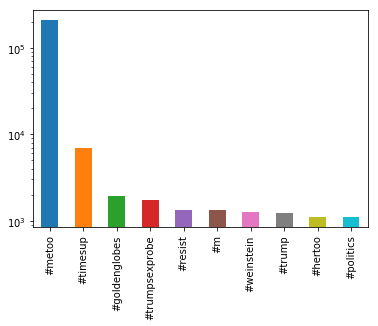

In [42]:
# showing the most popular hashtag as a bar plot
hashtag['hashtag'].value_counts().head(10).plot('bar')
plt.yscale('log')
plt.show()

# Temporal analysis

Here, the idea is to explore the temporal evolution of the movement. In this purpose, we will analyze this with two steps :
- **By month** : showing the number of #MeToo tweets by month
- **By day** : showing the number of #MeToo tweets by day

To do so, we will use the column *dateoftweet* containing the absolute date of tweet publication.

## By month

In [9]:
# Converting the column representing the date of tweet publication to a convenient format
tweets['dateoftweet'] = pd.to_datetime(tweets['dateoftweet'],format="%a %b %d %X +0000 %Y",errors='coerce')
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382497 entries, 0 to 393206
Data columns (total 14 columns):
id                         382497 non-null float64
insertdate                 382492 non-null object
twitterhandle              382492 non-null object
followers                  382492 non-null object
hashtagsearched            382492 non-null object
tweetid                    382492 non-null object
dateoftweet                382492 non-null datetime64[ns]
text                       382492 non-null object
lastcontactdate            376797 non-null object
lasttimelinepull           375831 non-null object
lasttimetweetsanalyzed     375741 non-null object
numberoftweetsanalysed     375704 non-null object
numberoftweetsabouthash    375687 non-null object
actualtwitterdate          255111 non-null object
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 43.8+ MB


In [10]:
# storing the relative month as a number between 1 and 12
tweets['month']=tweets["dateoftweet"].dt.month
# storing the absolute month as a combination year-month
tweets['YearMonth'] = tweets['dateoftweet'].map(lambda x: str(x.year)+'-'+str(x.month))
# displaying some samples
tweets.head()

,id,insertdate,twitterhandle,followers,hashtagsearched,tweetid,dateoftweet,text,lastcontactdate,lasttimelinepull,lasttimetweetsanalyzed,numberoftweetsanalysed,numberoftweetsabouthash,actualtwitterdate,month,YearMonth
0,2365116.0,2018-02-08 16:38:00,comsatori,7216,metoo,961730576167288832,2018-02-08 22:36:52,RT @IxAmandaDelgado: @Navegaciones @FelipeCald...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2
1,2365115.0,2018-02-08 16:38:00,mchris4duke,9661,metoo,961730578398830592,2018-02-08 22:36:52,RT @alexwitze: .@NSF will require institutions...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2
2,2365114.0,2018-02-08 16:38:00,munakk,10,metoo,961730610824871936,2018-02-08 22:37:00,Listening to the awesome feminist scholar Cynt...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2
3,2365113.0,2018-02-08 16:38:00,masayakondo,1487,metoo,961730619393810432,2018-02-08 22:37:02,??????????????????????????????????????????????...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2
4,2365112.0,2018-02-08 16:38:00,eddydur,33,metoo,961730655506915328,2018-02-08 22:37:11,"RT @AlbertoBernalLe: ?A ver, donde est?n todas...",2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2


In [11]:
# counting the number of tweets published during each month
tweets_count = tweets.groupby(tweets["YearMonth"]).count()[['id']]
# renaming columns
tweets_count = tweets_count.rename(columns={'YearMonth': 'YearMonth', 'id': 'tweet count'})
# displaying some samples
tweets_count.head()

,tweet count
YearMonth,
2017-10,5968
2017-11,110571
2017-12,142394
2018-1,101941
2018-2,21618


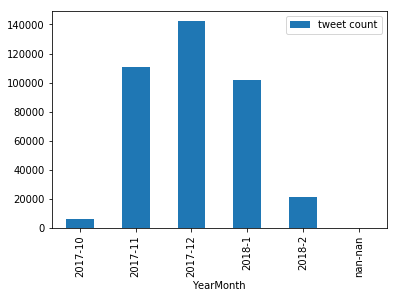

In [12]:
# plotting the number of tweets at each month, as a bar plot, to show the temporal evolution of the phenomenon
tweets_count.plot(kind='bar')
plt.show()

## Time serie (one point per day)

In [13]:
# storing the relative day as a number between 1 and 31
tweets['day']=tweets["dateoftweet"].dt.day
# storing the absolute date
tweets['YearMonthDay'] = tweets['dateoftweet'].dt.date
# displaying some samples
tweets.head()

,id,insertdate,twitterhandle,followers,hashtagsearched,tweetid,dateoftweet,text,lastcontactdate,lasttimelinepull,lasttimetweetsanalyzed,numberoftweetsanalysed,numberoftweetsabouthash,actualtwitterdate,month,YearMonth,day,YearMonthDay
0,2365116.0,2018-02-08 16:38:00,comsatori,7216,metoo,961730576167288832,2018-02-08 22:36:52,RT @IxAmandaDelgado: @Navegaciones @FelipeCald...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2,8.0,2018-02-08
1,2365115.0,2018-02-08 16:38:00,mchris4duke,9661,metoo,961730578398830592,2018-02-08 22:36:52,RT @alexwitze: .@NSF will require institutions...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2,8.0,2018-02-08
2,2365114.0,2018-02-08 16:38:00,munakk,10,metoo,961730610824871936,2018-02-08 22:37:00,Listening to the awesome feminist scholar Cynt...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2,8.0,2018-02-08
3,2365113.0,2018-02-08 16:38:00,masayakondo,1487,metoo,961730619393810432,2018-02-08 22:37:02,??????????????????????????????????????????????...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2,8.0,2018-02-08
4,2365112.0,2018-02-08 16:38:00,eddydur,33,metoo,961730655506915328,2018-02-08 22:37:11,"RT @AlbertoBernalLe: ?A ver, donde est?n todas...",2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,2.0,2018-2,8.0,2018-02-08


In [14]:
# counting the number of tweets published at each day
tweets_count2 = tweets.groupby(tweets["YearMonthDay"]).count()[['id']]
# renaming columns
tweets_count2 = tweets_count2.rename(columns={'YearMonthDay': 'YearMonthDay', 'id': 'tweet count'})
# showing the results
tweets_count2

,tweet count
YearMonthDay,
2017-10-30,3029
2017-10-31,2939
2017-11-01,2893
2017-11-02,4628
2017-11-03,1583
2017-11-04,1604
2017-11-05,2157
2017-11-06,2273
2017-11-07,1147


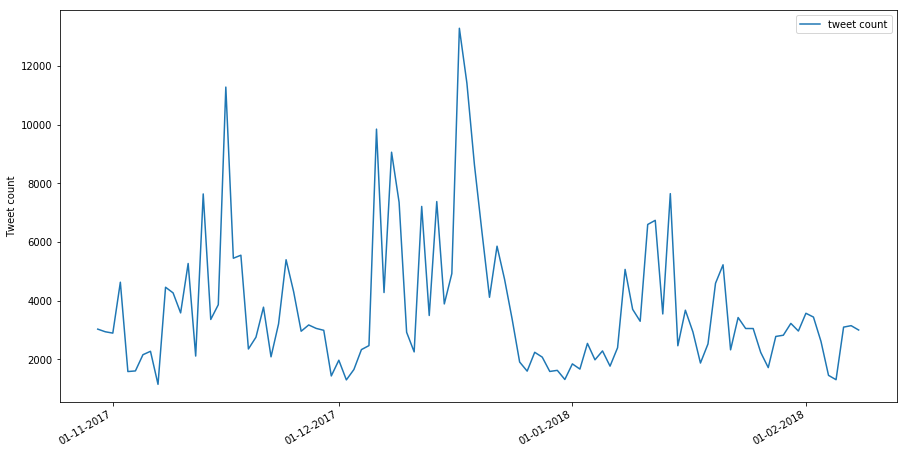

In [15]:
# showing the temporal evolution, with a point for each day

# convert date objects from pandas format to python datetime
index = pd.date_range(start = "2017-10-30", end = "2018-02-08", freq = "D")
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
data = tweets_count2['tweet count']
df = pd.DataFrame(data=data,index=index, columns=['tweet count'])

ax = df.plot(figsize=(15,8))
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.ylabel('Tweet count')

plt.show()

## Interactive timeline

Let's try to make the above plot more interactive...

We would like to plot the movement activity (number of tweets) for each hashtags. The user interface will be a simple dropdown menu where the user can select a hashtag and visualize interactively the corresponding activity.

As for the list of selectable hashtags, we will use some of the hashtags that are the most frequent (see section "most popular hashtags").

In [35]:
# showing the most popular hashtags

tweets['text'] = tweets['text'].str.replace(r'\r', ' ')
hashtag = tweets[['id','text']]

# extracting the hastags
hashtags_extracted = hashtag['text'].str.extractall('(?P<hashtag>#\w+)')
hashtags_extracted = hashtags_extracted.reset_index(level=1)
hashtags_extracted = hashtags_extracted.join(hashtag['id'])

# lowering the case
hashtags_extracted['hashtag'] = hashtags_extracted['hashtag'].str.lower()
hashtags_extracted = hashtags_extracted[['id', 'hashtag']]

# merging the tweets and the hashtag list
hashtag = pd.merge(hashtag, hashtags_extracted, how='right', on='id')

# couting the number of occurences for each hashtag
hashtag['hashtag'].value_counts().head(50)

#metoo                  211521
#timesup                  6967
#goldenglobes             1930
#trumpsexprobe            1744
#resist                   1318
#m                        1316
#weinstein                1262
#trump                    1214
#hertoo                   1113
#politics                 1097
#me                       1084
#balancetonporc           1059
#met                       987
#maga                      982
#sheknew                   954
#hollywood                 946
#womensmarch2018           939
#sexualharassment          931
#roymoore                  924
#sexualpredatortrump       890
#becauseofhim              797
#harveyweinstein           738
#meto                      729
#breaking                  725
#franken                   712
#opinion                   686
#featured                  668
#sexualassault             639
#theresistance             630
#grammys                   627
#120db                     603
#louisck                   600
#womensm

In [36]:
common_hashtags = ['#metoo','#timesup','#goldenglobes','#trumpsexprobe','#resist','#weinstein','#hertoo','#politics',
                  '#balancetonporc','#sheknew','#hollywood','#womensmarch2018','#sexualharassment','#roymoore',
                  '#harveyweinstein']          

In [37]:
dateframe = {}
texts = {}

tweets['text lower'] = tweets['text'].str.lower()

for i in range(len(common_hashtags)):
    
    this_hashtag = common_hashtags[i]
    
    print(this_hashtag)
    
    hashtag_df = tweets[tweets['text lower'].str.contains(this_hashtag)].copy()
    
    # storing the relative day as a number between 1 and 31
    hashtag_df['day']=hashtag_df["dateoftweet"].dt.day
    
    # storing the absolute date
    hashtag_df['YearMonthDay'] = hashtag_df['dateoftweet'].dt.date
    
    # counting the number of tweets published at each day
    tweets_count2 = hashtag_df.groupby(hashtag_df["YearMonthDay"]).count()[['id']]
    # renaming columns
    tweets_count2 = tweets_count2.rename(columns={'YearMonthDay': 'YearMonthDay', 'id': 'tweet count'})
    
    # convert date objects from pandas format to python datetime
    index = pd.date_range(start = "2017-10-30", end = "2018-02-08", freq = "D")
    index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
    data = tweets_count2['tweet count']
    dateframe[this_hashtag] = pd.DataFrame(data=data,index=index, columns=['tweet count'])
    
    dateframe[this_hashtag] = dateframe[this_hashtag].fillna(0)
    
    # for the word cloud
    
    text = " ".join(review for review in hashtag_df.text)

    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    texts[this_hashtag] = re.sub(r"#\S+", "", text)

#metoo
#timesup
#goldenglobes
#trumpsexprobe
#resist
#weinstein
#hertoo
#politics
#balancetonporc
#sheknew
#hollywood
#womensmarch2018
#sexualharassment
#roymoore
#harveyweinstein


In [38]:
csvs = dateframe
options = common_hashtags

def plot(hashtag="#metoo"):
    #ind = np.where(options==x)[0][0]
    print('You selected the hashtag ',hashtag)
    
    mydf = csvs[hashtag]
 
    ax = mydf.plot(figsize=(15,8))
    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()
    plt.ylabel('Tweet count')

    plt.show()
    
    bubble_mask = np.array(Image.open("bubble_mask.png"))
    shape_wordcloud(bubble_mask,texts[hashtag])

w = widgets.Select(options=options)
interactive(plot, hashtag=w)



C:\Users\art34\Anaconda3\envs\ada\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(Select(description='hashtag', options=('#metoo', '#timesup', '#goldenglobes', '#trumpsex…

In [52]:
buttons = list()
traces = list()
counter = 0

for hashtag in dateframe.keys():
    if counter == 0:
        myvisible = True
    else:
        myvisible = False
    visibles = [False] * len(dateframe)
    visibles[counter] = True
    my_events=[dict(x='2018-01-08',
                       y=int(dateframe[hashtag].loc[date(2018,1,8)]),
                       xref='x', yref='y',
                       text='Golden <br> Globes',
                       ax=0, ay=-40, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2018-01-21',
                       y=int(dateframe[hashtag].loc[date(2018,1,21)]),
                       xref='x', yref='y',
                       text='Women\'s <br> march',
                       ax=0, ay=-40, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2017-12-6',
                       y=int(dateframe[hashtag].loc[date(2017,12,6)]),
                       xref='x', yref='y',
                       text='Time\'s person <br> of the year',
                       ax=0, ay=-80, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2017-11-9',
                       y=int(dateframe[hashtag].loc[date(2017,11,9)]),
                       xref='x', yref='y',
                       text='Accus. <br> of Roy <br> Moore',
                       ax=0, ay=-70, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2017-12-12',
                       y=int(dateframe[hashtag].loc[date(2017,12,12)]),
                       xref='x', yref='y',
                       text='Election <br> for senate <br> in Alabama',
                       ax=0, ay=-40, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2017-11-15',
                       y=int(dateframe[hashtag].loc[date(2017,11,15)]),
                       xref='x', yref='y',
                       text='Me <br> Too <br> Congress <br> Act',
                       ax=0, ay=-300, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2017-11-23',
                       y=int(dateframe[hashtag].loc[date(2017,11,23)]),
                       xref='x', yref='y',
                       text='Uma <br> Thurman <br> accuses <br> Harvey <br> Weinstein',
                       ax=0, ay=-150, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2017-11-12',
                       y=int(dateframe[hashtag].loc[date(2017,11,12)]),
                       xref='x', yref='y',
                       text='Hollywood <br> march',
                       ax=0, ay=-240, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8),
              dict(x='2017-12-17',
                       y=int(dateframe[hashtag].loc[date(2017,12,17)]),
                       xref='x', yref='y',
                       text='Meryl Streep <br> silence is <br> pointed out',
                       ax=0, ay=-100, arrowhead=1.2,arrowsize=1.2, arrowwidth=1.2, opacity=0.8)]
    traces.append(go.Scatter(x=dateframe[hashtag].index,
                          y=dateframe[hashtag]['tweet count'],
                          name=hashtag,visible=myvisible,opacity=.5))
    buttons.append(dict(label = hashtag, method = 'update',
                        args = [{'visible' : visibles}, {'title' : hashtag, 'annotations' : my_events}]))
    counter = counter + 1
    
updatemenus = list([
    dict(active=0,
         buttons=list(buttons),
        x=1)])

layout = dict(title='#metoo', showlegend=False,
              updatemenus=updatemenus, yaxis=dict(title='Number of tweets'),
              autosize=False,
              width=1000,
              height=700,)

fig = dict(data=traces, layout=layout)
py.plotly.iplot(fig, filename='update_button')

plotly.offline.plot(fig, filename='buttons.html')
#plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~art345epfl/0 or inside your plot.ly account where it is named 'update_button'


'file://C:\\Users\\art34\\Desktop\\MeToo_copy\\buttons.html'

In [40]:
img_width = 512
img_height = 512
scale_factor = 1

layout = go.Layout(
    xaxis = go.layout.XAxis(
        visible = False,
        range = [0, img_width*scale_factor]),
    yaxis = go.layout.YAxis(
        visible=False,
        range = [0, img_height*scale_factor],
        # the scaleanchor attribute ensures that the aspect ratio stays constant
        scaleanchor = 'x'),
    width = img_width*scale_factor,
    height = img_height*scale_factor,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    images = [go.layout.Image(
        x=0,
        sizex=img_width*scale_factor,
        y=img_height*scale_factor,
        sizey=img_height*scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source='https://raw.githubusercontent.com/vancauwe/MeToo/master/hashtag.png')]
)
# we add a scatter trace with data points in opposite corners to give the Autoscale feature a reference point
fig = go.Figure(data=[{
    'x': [0, img_width*scale_factor], 
    'y': [0, img_height*scale_factor], 
    'mode': 'markers',
    'marker': {'opacity': 0}}],layout = layout)
py.iplot(fig)

plotly.offline.plot(fig, filename='wordcloud.html')

'file://C:\\Users\\art34\\Desktop\\MeToo_copy\\wordcloud.html'

# GENDER AND SENTIMENTAL ANALYSIS

### Load Data

In [5]:
data_folder = './data/'
twitter_data = tweets
rawdata = open(data_folder+'metootweets.csv', "rb").read()
result = chardet.detect(rawdata)
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

# GENDER DATA: GenderPerformr

## GENDER ANALYSIS

Credits for genderperformr function: 

@inproceedings{

       wang2018its,

       title={It's going to be okay: Measuring Access to Support in Online Communities},
       
       author={Wang, Zijian and Jurgens, David},
       
       booktitle={Proceedings of the Conference on Empirical Methods in Natural Language Processing (EMNLP)},
       
       year={2018}
}


To get the gender of our twitter users we used GenderPerformr, a method based on a LSTM model built in pytorch. This method take and user name and return a number between 0 and 1 (0 being masculine and 1 feminine) as well as a label (F, M or N).

### Apply genderperformr to all the Twitter Usernames

genderperformr is of use to us because it allows to infer the username's gender with a certain probability.
The outputs of the function can be the following: 
- M (male)
- F (female)
- N (neutral)

In [5]:
probs=[]
labels=[]

for i in range(0,len(twitter_data['twitterhandle'])):
    # Predict a single username
    prob, label = gp.predict(str(twitter_data['twitterhandle'][i]))
    probs.append(prob)
    labels.append(label)


Create a pandas DataFrame with:
- the username, 
- the twitter index present in the original data set (to easily merge with original data or with sentimental analysis extracted data), 
- the gender label (M,F,N),
- the 'pseudo-proba' as a percentage, hence a kind of measure of accuracy. if close to 0 we get label M and if close to 1 we get label F 

In [6]:
columns=['twitter_index','userID','gender_label', 'proba']
index=np.array(range(0,len(labels)))
gender_df=pd.DataFrame(index=index,columns=columns)
gender_df['userID']=twitter_data['twitterhandle']
gender_df['gender_label']=labels
gender_df['proba']=probs
gender_df['twitter_index']=gender_df.index

gender_df=gender_df.replace('', np.nan).dropna()

gender_df=gender_df.reset_index(drop=True)
gender_df.head()

,twitter_index,userID,gender_label,proba
0,0,comsatori,N,0.477717
1,1,mchris4duke,M,0.076448
2,13,Conor_Irwin,M,0.094554
3,15,PeteBrandon18,M,0.064439
4,16,FSMGlobalHealth,N,0.494115


### Save to CSV file

In [7]:
gender_df.to_csv('genderData.csv')

In [8]:
gender_df.shape

(115220, 4)

### Gender Data Evaluation

In [85]:
prediction_percentage = gender_df.shape[0]/ twitter_data.shape[0] * 100

print('Gender data -Masculin, Feminin, or Neutral- was obtained for ' + str(prediction_percentage) +'% of the users.')

Gender data -Masculin, Feminin, or Neutral- was obtained for 29.30263194704062% of the users.


### Look at the neutral usernames

In [86]:
idx_N=np.where(gender_df['gender_label']=='N')
idx_N

(array([     0,      4,      7, ..., 115213, 115215, 115218]),)

In [90]:
for i in range(0, len(idx_N)):
    print(gender_df['userID'][idx_N[i]])

0                            comsatori
4                      FSMGlobalHealth
7                           Francalata
15                         LikeTheMtns
16                 2015-01-01 00:00:00
20                          ThReOfPiss
24                              fnkbnr
25                             Iyoku07
28                            act_once
29                     grajzbdrypvdi21
33                      todayspromise1
34                     ocarinaofreason
35                     marvelousfiasco
36                     mementolibertas
38                     ethicalpsycholo
46                          achillez16
48                           svartaree
49                     pulpfictionbuff
52                        vivawawi1678
54                          yvommurphy
55                            pltmenon
60         t? https://t.co/RxYFaP9FHG"
61                     libradagraham23
66                     piyzcwswucin151
67                         LawAnalysis
69                     ha

### Look at the proportions of the male, female and neutral usernames

In [91]:
gender_df_agg=gender_df.copy()

gender_df_count=gender_df_agg.groupby('gender_label').count()
gender_df_count=gender_df_count.drop('proba',axis=1)
gender_df_count.head()

,twitter_index,userID
gender_label,,
F,35286,35286
M,34760,34760
N,45174,45174


We have a majority of Neutral genders: possibly institutions or bigger entities than individuals. However, when briefly looking over them we see some would qualify "LawAnalysis" or " FMSGlobalHealth" while others seem to be individuals having given themselves a neutral name such as "YogaBear." 

However, for the non neutral we have a 50-50 ratio of Men and Women, making their responses comparable. 

We keep in mind that there this gender analysis only accounts for 30% of our dataset.

### Subsequent Analysis

We will now combine the gender analysis with the sentimental analysis to obtain a bivariate interaction of our data. We will keep in mind that the gender analysis does only applies to 30% of our data set and that the Neutral Gender cannot be uniformly defined. Hence the gender analysis will be solely very representative of a minority of our sample and not of the overall dataset. 

Note: See README for further information.

# SENTIMENTAL ANALYSIS: LIWC

In order to provide an efficient and effective method for studying the various emotional, cognitive, and structural components present in individuals’ verbal and written speech samples, a text analysis application called Linguistic Inquiry and Word Count, or LIWC, was created. It was our choice tool to conduct a sentimental data extraction from all our tweets. 

## LIWC CREATION & APPLICATION TO OURS TWEETS

### Take only the tweets

In [16]:
tweets=twitter_data['text']
tweets_array=np.array(tweets)

### Create the LIWC tool from the .txt file

In [17]:
def get_liwc_groups():
    """ 
    Parses LIWC file
    return:
    - {word with suffixed endings : [LIWC groups]}
    - {LIWC group : set([complete words])}
    - [liwc group names]
    """
    liwc = open('en_liwc.txt', 'r')
    star_words = defaultdict(list) # prefix : categories
    all_words = defaultdict(set) # category : words 
    liwc_names = [] 
    for line in liwc:
        l = line.split()
        g = l[0]
        liwc_names.append(g)
        words = l[1:]
        for w in words:
            w = w.lower()
            if w.endswith('*'):
                w = w[:-1]
                star_words[w].append(g)
            else:
                all_words[g].add(w) 
    liwc.close()
    return star_words, all_words, liwc_names

In [18]:
#liwc names is the ladders to qualify the text
star_words, all_words, liwc_names = get_liwc_groups()

We take a look at all the LIWC categories

In [19]:
liwc_names

['Ppron:',
 'Inhib:',
 'Space:',
 'Filler:',
 'Ipron:',
 'Time:',
 'Percept:',
 'Verbs:',
 'Quant:',
 'Discrep:',
 'Relativ:',
 'Affect:',
 'You:',
 'Cause:',
 'Prep:',
 'Relig:',
 'Body:',
 'Bio:',
 'We:',
 'Assent:',
 'Incl:',
 'Leisure:',
 'AuxVb:',
 'Hear:',
 'They:',
 'Posemo:',
 'Article:',
 'Excl:',
 'Home:',
 'Friends:',
 'Present:',
 'Numbers:',
 'CogMech:',
 'I:',
 'Work:',
 'Tentat:',
 'Ingest:',
 'Motion:',
 'Anger:',
 'Achiev:',
 'Swear:',
 'Death:',
 'Social:',
 'Nonflu:',
 'Family:',
 'Pronoun:',
 'Funct:',
 'Feel:',
 'Certain:',
 'Insight:',
 'Humans:',
 'Sad:',
 'Past:',
 'See:',
 'Future:',
 'Adverbs:',
 'SheHe:',
 'Money:',
 'Negate:',
 'Health:',
 'Conj:',
 'Anx:',
 'Negemo:',
 'Sexual:']

### Apply the LIWC to our tweets

This function gets all LIWC categories for the given 'text' variable. The function will receive individually each tweet as 'text.'

In [20]:
def get_liwc_features(text):
    text = text.lower()
    text = re.sub("[^\w\d'\s]+", '', text)
    tok_counts = Counter(text.split())
    new_features = [0]*len(liwc_names)

    indices = {k: v for v, k in enumerate(liwc_names)}
    for g in all_words:
        new_features[indices[g]] += sum([c for x,c in tok_counts.items() if x in all_words[g]])
    for tok in tok_counts:
        for w in star_words:
            if tok.startswith(w): 
                groups = star_words[w]
                for g in groups:
                    new_features[indices[g]] += tok_counts[tok]
    return new_features



This function was designed to process all tweets by giving them individually to the get_liwc_features function. It creates a pandas DataFrame with the tweet itself and an array of the LIWC categories counted for that tweet.

In [22]:
def process_language_tweets(tweets):
    
    #create Dataframe to save all tweets and the identified features
    columns=np.array(range(len(liwc_features_wanted)))
    index=np.array(range(0,len(tweets)))
    features_per_tweet=pd.DataFrame(index=index,columns=columns)
    features_per_tweet.loc[:,'tweets'] = pd.Series(tweets, index=features_per_tweet.index)
    
    #put tweets column as first column of dataframe for easy reading
    cols=features_per_tweet.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    features_per_tweet=features_per_tweet[cols]
    
    for i in range(len(tweets)):
        #print(i)
        #reinitialize
        tweet_features=[]
        significant_features_id=[]
        
        #call LIWC on this tweet
        weights=np.array(get_liwc_features(str(tweets[i])))
        
        #save the weights of each category in the columns corresponding respectively to our categories of interest
        features_per_tweet.loc[i,1:len(liwc_features_wanted)+1]=weights[liwc_features_wanted]
        
    return features_per_tweet
        

### Keep only specific LIWC Categories
See below for the exact reason these were the categories kept. They are the only relevant categories for our analysis

In [23]:
liwc_features_wanted=[52,30,54,11,19,25,39,38,40,51,58,61,62, 49, 6, 23,\
                      32,37,47,53,18,24,12,33,56,48,39,35,16,17,42,50,57,59,63,41,\
                      15,21,28,29,34,44,8,31]
len(liwc_features_wanted)

44

In [34]:
features_per_tweet=process_language_tweets(tweets_array)

The cell above creates 44 new columns for each of the 380 000 or so tweets our data set contains. The process is extremely time consuming and takes 3 days. For this reason we aimed to save the results in a csv file. However, saving as csv and reopening gave us new line entries. Hence we chose to perform our analysis and save the resulting number of that analysis. 

Below we confirm that the analysis has been done for all tweets of the dataset.
Features_per_tweet contains the tweet in the first column and the 44 weights respective to each LIWC category in the following 44 columns.

In [25]:
features_per_tweet.shape

(382497, 45)

In [26]:
twitter_data.shape

(382497, 14)

### Saving the LIWC results per tweet

In [28]:
features_per_tweet.to_csv('features_per_tweet.csv', encoding='ascii')

# Subsequent Analysis

In [ ]:
sentimental_data=pd.read_csv('features_per_tweet.csv')
sentimental_data=sentimental_data.drop('Unnamed: 0',axis=1)

# This line is MANDATORY because else we observe that the number of entry lines does not correspond to 382497
sentimental_data=features_per_tweet

In [47]:
rawdata2 = open('features_per_tweet.csv', "rb").read()
result = chardet.detect(rawdata2)
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

As explained, we cannot seem to reload the saved tweets & category weights dataframe without generating erroneous new lines (see cell below where the shape is 386774 tweets instead of 382497). We verified encoding, this was not the source of the problem. Hence we carried out subsequent analysis using the original dataframe created (not the one reuploaded from csv).

In [50]:
sentimental_data.shape

(386774, 45)

# Analysis Considerations 

The output analysis has several dimensions. 

### I. Temporal : 
- 'Past:',  {52}
- 'Present:', {30}
- 'Future:' {54}


### II. Emotional Analysis: 

**Measure if people are affected:**
- ‘Affect:', (happy cried) {11}

**Positive:** 
 - ‘Assent:' {19}
 - ‘Posemo:' {25}
 - ‘Achiev:' {39}
 
**Negative:**
 - 'Anger:' {38}
 - 'Swear:' {40}
 - ’Sad:’ {51}
 - ’Negate:' {58}
 - 'Anx:' {61}
 - 'Negemo:' {62}

### III. Implication and Group Dynamics Analysis

**How is implication done?**
- ’Insight:’, (think, know) {49}
- ‘Percept:', (look, heard, feeling) {6}
- ‘Hear:’, {23}
- ‘CogMech:', (cause, know, ought) {32}
- ‘Motion:', {37}
- ’Feel:’, {47}
- ’See:', {53}

**Personal Implication:**
- ‘We:', 
- ‘I:',

**Impersonal Implication:**
- ‘You:’,
- ‘They:',
- 'SheHe:',

**Group Dynamics:**
- ‘We:',{18}
- ‘They:', {24}

**Individual Dynamics**
- ‘You:’, {12}
- ‘I:', {33}
- 'SheHe:', {56}

**Certitude:**
- 'Certain:', {48}
- ‘Achiev:', {39}

**Indecisiveness:**
- ‘Tentat:’, {35}



### IV. Thematics Analysis
- ‘Body:', {16}
- ‘Bio:’, {17}
- ’Social:', {42}
- ‘Humans:', {50}
- 'Money:', {57}
- ’Health:’, {59}
- ’Sexual:' {63}
- 'Death:', {41}

### V. Context Analysis:
- ‘Relig:', {15}
- ‘Leisure:', {21}
- ‘Home:', {28}
- ‘Friends:’ {29}
- ’Work:', {34}
- ’Family:’, {44}

### VI. Quantification Analysis
- ‘Quant:', {8}
- ‘Numbers:', {31}

### VII. Causation Analysis
Attempting to explain/debate movement:
- ‘Cause:',  (because, effect) {13}


## Implementing Analysis Functions

Goal of the functions: input the index of some tweets you want to have analyzed. These indexes are then used to take the corresponding stored sentimental data from the identically named pandas dataframe.

Below: a reminder of the categories we are going to be looking at.

In [79]:
our_liwc_names

array(['Past:', 'Present:', 'Future:', 'Affect:', 'Assent:', 'Posemo:',
       'Achiev:', 'Anger:', 'Swear:', 'Sad:', 'Negate:', 'Anx:',
       'Negemo:', 'Insight:', 'Percept:', 'Hear:', 'CogMech:', 'Motion:',
       'Feel:', 'See:', 'We:', 'They:', 'You:', 'I:', 'SheHe:',
       'Certain:', 'Achiev:', 'Tentat:', 'Body:', 'Bio:', 'Social:',
       'Humans:', 'Money:', 'Health:', 'Sexual:', 'Death:', 'Relig:',
       'Leisure:', 'Home:', 'Friends:', 'Work:', 'Family:', 'Quant:',
       'Numbers:'], dtype='<U8')

This function sums up weights for a given category over all tweets referenced by the tweet IDs/indexes.

In [58]:
def get_counts_for_categories(IDs, categories):
    tweets_to_analyse=features_per_tweet.loc[IDs,categories]
    counts=tweets_to_analyse.sum(axis=0)

    return counts
    

Based on the counts and categories, this function returns the percentages of each category for a given analysis. For example, if we are conducting the temporal analysis: in the tweets we are examining, which percentage corresponds to the Past, which to the Present and which to the Future? 

In [59]:
def get_percentages(counts, categories):

    total=counts.sum(axis=0)
    percentages=np.zeros(len(counts))
    for c in range(len(counts)):
        
        percentages[c]= np.floor(counts.loc[categories[c]]/total * 100)
        
    percentages_df=pd.DataFrame(percentages)
    percentages_df.index=categories-1
    percentages_df=percentages_df.rename(columns={0: 'percentages (%)'})
    percentages_df=percentages_df.round(decimals=4)
    return percentages_df

    
    

This function is the core function which calls the two above. It returns a dataframe where each column is a LIWC category name and each entry of the dataframe is a percentage. It conducts simultaneously all the analysis presented in the Analysis Considerations for the given set of tweets IDs that are given. 

In [157]:
def do_analysis_complete(index, categories_vect, IDs, length_original_data):
    columns=[]
    for cat in range(len(categories_vect)):
        categories=categories_vect[cat]
        for c in range(len(categories)):
            columns.append(our_liwc_names[categories[c]-1])
        
    df=pd.DataFrame(index=index,columns=columns)
    all_percentages=[]
    if (len(IDs)==length_original_data):
        
        for cat in range(len(categories_vect)):
            percentages=[]
            
            counts=get_counts_for_categories(IDs, categories_vect[cat])
            
            percentages=get_percentages(counts, categories_vect[cat])
            
            all_percentages.append(percentages)
            
        all_percentages=np.concatenate(all_percentages)   
        df.iloc[0]=all_percentages.transpose()
            
    else:
        
        for i in range(len(IDs)):
            all_percentages=[]
            for cat in range(len(categories_vect)):
                percentages=[]
            
                counts=get_counts_for_categories(IDs[i], categories_vect[cat])

                percentages=get_percentages(counts, categories_vect[cat])
                all_percentages.append(percentages)
                
                
            all_percentages=np.concatenate(all_percentages)
            df.iloc[i]=all_percentages.transpose()
    
    return df

    

## Define all categories

In [88]:
all_cat=np.array([np.array([1,2,3]), np.array([4]),np.array([5,6,7,8,9,10,11,12,13]), \
                 np.array([14, 15, 16, 17,18,19,20]),np.array([21,22,23,24,25]),np.array([26,27,28]), \
                 np.array([29,30,31,32,33,34,35,36]),np.array([37,38,39,40, 41,42]),np.array([43,44])])

# Apply Analysis to ALL Data

In [99]:
index=np.array(['all_tweets'])

IDs=twitter_data.index

df_all=do_analysis_complete(index, all_cat, IDs,len(twitter_data.index))
df_all

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
all_tweets,47,4,47,100,21,9,17,1,2,9,...,0,1,22,4,2,31,4,34,100,0


In [100]:
df_all.to_csv('analysisAllData.csv', encoding='ascii')

In [104]:
df_all_reuploaded=pd.read_csv('analysisAllData.csv')
df_all_reuploaded=df_all_reuploaded.drop('Unnamed: 0',axis=1)
df_all_reuploaded

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
0,47,4,47,100,21,9,17,1,2,9,...,0,1,22,4,2,31,4,34,100,0


# BIVARIATE Analysis: Gender-based and Sentimental Analysis
Here we combine the results of our gender analysis to a sentimental analysis. In this manner we obtain an analysis according to the gender male or female of 30% of our dataset.

In [106]:
gender_data=pd.read_csv('genderData.csv')
gender_data=gender_data.drop('Unnamed: 0',axis=1)

In [107]:
gender_data.head()

,twitter_index,userID,gender_label,proba
0,0,comsatori,N,0.477717
1,1,mchris4duke,M,0.076448
2,13,Conor_Irwin,M,0.094554
3,15,PeteBrandon18,M,0.064439
4,16,FSMGlobalHealth,N,0.494115


In [194]:
gender_data.shape

(115220, 4)

### Split Gender Data into Male and Female Tweets

In [108]:
male_tweets=gender_data.loc[gender_data['gender_label']=='M'].reset_index().drop('index',axis=1)

print(male_tweets.shape)
male_tweets.head()

(34760, 4)


,twitter_index,userID,gender_label,proba
0,1,mchris4duke,M,0.076448
1,13,Conor_Irwin,M,0.094554
2,15,PeteBrandon18,M,0.064439
3,25,garyfogarty498,M,0.055188
4,27,RoyCalbeck,M,0.029913


In [109]:
female_tweets=gender_data.loc[gender_data['gender_label']=='F'].reset_index().drop('index',axis=1)

print(female_tweets.shape)
female_tweets.head()

(35286, 4)


,twitter_index,userID,gender_label,proba
0,22,AngelaLSharpe,F,0.966294
1,28,MrsCruz1999,F,0.969846
2,42,ellie09211,F,0.904622
3,67,thebrandedgirl,F,0.925231
4,75,JaneyMackWriter,F,0.932676


In [111]:
maleIDs=np.array(male_tweets['twitter_index'])
femaleIDs=np.array(female_tweets['twitter_index'])

In [119]:
index=np.array(['male_tweets', 'female_tweets'])

IDs=[maleIDs,femaleIDs]

df_gender=do_analysis_complete(index, all_cat, IDs, len(twitter_data.index))
df_gender

0
1


,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
male_tweets,47,4,47,100,21,9,16,1,2,9,...,0,1,22,4,2,31,4,34,100,0
female_tweets,47,5,47,100,20,9,17,1,2,9,...,0,1,22,4,2,31,4,34,100,0


In [120]:
df_gender.to_csv('analysisGender.csv', encoding='ascii')
df_gender_reuploaded=pd.read_csv('analysisGender.csv')
df_gender_reuploaded=df_gender_reuploaded.drop('Unnamed: 0',axis=1)
df_gender_reuploaded

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
0,47,4,47,100,21,9,16,1,2,9,...,0,1,22,4,2,31,4,34,100,0
1,47,5,47,100,20,9,17,1,2,9,...,0,1,22,4,2,31,4,34,100,0


# BIVARIATE ANALYSIS: Sentimental and Temporal

Here our goal is to obtain a sentimental analysis based on the LIWC features per day that is covered in our tweets. In this manner we see the evolution of the each category of the analysis over time. 

In [6]:
twitter_data['dateoftweet'] = pd.to_datetime(twitter_data['dateoftweet'],format="%a %b %d %X +0000 %Y",errors='coerce')
# storing the relative day as a number between 1 and 31
twitter_data['day']=twitter_data["dateoftweet"].dt.day
# storing the absolute date
twitter_data['YearMonthDay'] = twitter_data['dateoftweet'].dt.date
# displaying some samples
twitter_data.head()

,id,insertdate,twitterhandle,followers,hashtagsearched,tweetid,dateoftweet,text,lastcontactdate,lasttimelinepull,lasttimetweetsanalyzed,numberoftweetsanalysed,numberoftweetsabouthash,actualtwitterdate,day,YearMonthDay
0,2365116.0,2018-02-08 16:38:00,comsatori,7216,metoo,961730576167288832,2018-02-08 22:36:52,RT @IxAmandaDelgado: @Navegaciones @FelipeCald...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,8.0,2018-02-08
1,2365115.0,2018-02-08 16:38:00,mchris4duke,9661,metoo,961730578398830592,2018-02-08 22:36:52,RT @alexwitze: .@NSF will require institutions...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,8.0,2018-02-08
2,2365114.0,2018-02-08 16:38:00,munakk,10,metoo,961730610824871936,2018-02-08 22:37:00,Listening to the awesome feminist scholar Cynt...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,8.0,2018-02-08
3,2365113.0,2018-02-08 16:38:00,masayakondo,1487,metoo,961730619393810432,2018-02-08 22:37:02,??????????????????????????????????????????????...,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,8.0,2018-02-08
4,2365112.0,2018-02-08 16:38:00,eddydur,33,metoo,961730655506915328,2018-02-08 22:37:11,"RT @AlbertoBernalLe: ?A ver, donde est?n todas...",2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0,NaN,8.0,2018-02-08


### Get all Unique Dates

In [7]:
all_dates=pd.Series(twitter_data['YearMonthDay'].unique())
all_dates=all_dates.sort_values().dropna().reset_index().drop('index',axis=1)
all_dates=all_dates[0]
all_dates[1:10]

1    2017-10-31
2    2017-11-01
3    2017-11-02
4    2017-11-03
5    2017-11-04
6    2017-11-05
7    2017-11-06
8    2017-11-07
9    2017-11-08
Name: 0, dtype: object

### Get all tweet IDs that correspond to a unique date

In [146]:
#get IDs per tweets
all_date_indexes=[]

for d in range(len(all_dates)):
    
    dates=twitter_data.index.get_indexer_for(twitter_data[twitter_data.YearMonthDay==all_dates[d]].index)
    indexes=dates
    all_date_indexes.append(indexes)
    
#all_date_IDs should have shape[0] equal to all_dates shape[0] => 1 row is for one day date

In [147]:
all_date_indexes=np.asarray(all_date_indexes)

In [148]:
all_date_indexes[6]

array([363664, 363665, 363666, ..., 365821, 365822, 365823])

all_date_indexes same length as all_dates because we have one index that corresponds to one unique date

In [149]:
len(all_date_indexes)

102

In [150]:
all_dates_array=np.asarray(all_dates)

In [151]:
type(all_dates_array)

numpy.ndarray

### Perform Analysis where LIWC data will be regrouped according to each unique date that has been identified. We get a day to day analysis. 

In [161]:
index=all_dates_array

IDs=all_date_indexes

df_time=do_analysis_complete(index, all_cat, IDs, len(twitter_data.index))
df_time.head()

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
2017-10-30,48,3,48,100,25,9,15,2,1,14,...,0,0,40,6,1,15,4,32,100,0
2017-10-31,48,3,47,100,22,6,16,1,1,13,...,0,0,35,4,1,20,5,32,100,0
2017-11-01,48,4,46,100,21,9,19,1,1,8,...,0,0,20,4,1,25,7,40,100,0
2017-11-02,42,3,53,100,29,11,15,0,1,7,...,1,1,14,11,1,26,3,42,100,0
2017-11-03,38,5,56,100,21,9,20,0,0,10,...,3,1,15,15,2,31,3,31,100,0


In [160]:
df_time.to_csv('analysisTime.csv', encoding='ascii')
df_time_reuploaded=pd.read_csv('analysisTime.csv')
df_time_reuploaded=df_time_reuploaded.drop('Unnamed: 0',axis=1)
df_time_reuploaded.head()

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
0,48,3,48,100,25,9,15,2,1,14,...,0,0,40,6,1,15,4,32,100,0
1,48,3,47,100,22,6,16,1,1,13,...,0,0,35,4,1,20,5,32,100,0
2,48,4,46,100,21,9,19,1,1,8,...,0,0,20,4,1,25,7,40,100,0
3,42,3,53,100,29,11,15,0,1,7,...,1,1,14,11,1,26,3,42,100,0
4,38,5,56,100,21,9,20,0,0,10,...,3,1,15,15,2,31,3,31,100,0


In [9]:
df_time_reuploaded=pd.read_csv('analysisTime.csv')
df_time_reuploaded=df_time_reuploaded.drop('Unnamed: 0',axis=1)
df_time_reuploaded.index=all_dates
df_time_reuploaded.head()

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
0,,,,,,,,,,,,,,,,,,,,,
2017-10-30,48,3,48,100,25,9,15,2,1,14,...,0,0,40,6,1,15,4,32,100,0
2017-10-31,48,3,47,100,22,6,16,1,1,13,...,0,0,35,4,1,20,5,32,100,0
2017-11-01,48,4,46,100,21,9,19,1,1,8,...,0,0,20,4,1,25,7,40,100,0
2017-11-02,42,3,53,100,29,11,15,0,1,7,...,1,1,14,11,1,26,3,42,100,0
2017-11-03,38,5,56,100,21,9,20,0,0,10,...,3,1,15,15,2,31,3,31,100,0


# GRAPHS

# Analysis on COMPLETE Dataset (All Tweets)

## Pie Charts

were used to represent the Context and Thematics Analysis, as well as the Implication Analysis with the means of Implication. 


### Context

In [236]:
labels = ['Family', 'Friends', 'Religion','Leisure', 'Work', 'Home']
values = [df_all['Family:'][0], df_all[ 'Friends:'][0],df_all['Relig:'][0] , df_all['Leisure:'][0],\
          df_all['Work:'][0], df_all['Home:'][0] ]
colors=['#e0feee', '#b3fed6', '#a1e4c0','#7db195','#597f6b' ,'#23322a']
context = go.Pie(labels=labels, values=values,
                marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

In [239]:
py.iplot([context], file_id='pie_chartContext')

In [240]:
plotly.offline.plot([context], filename='pieplotContext.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/pieplotContext.html'

### Thematics

In [249]:
labels = ['Biology', 'Body', 'Social', 'Health', 'Humans', 'Death','Money', 'Sexual']
values = [df_all[ 'Bio:'][0], df_all['Body:'][0], df_all['Social:'][0], df_all['Health:'][0], df_all['Humans:'][0], \
          df_all['Death:'][0], df_all['Money:'][0],df_all['Sexual:'][0],]
colors=[ '#febebe', '#fd7e7e','#fd5252','#fd2828' ,'#ca2020','#971818','#651010', '#320808' ]
thematics = go.Pie(labels=labels, values=values,
                  marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
py.iplot([thematics], file_id='pie_chartThematics')

In [250]:
plotly.offline.plot([thematics], filename='pie_chartThematics.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/pie_chartThematics.html'

### Implication: How? 

In [243]:
labels = [ 'Hear', 'Insight' , 'Cognitive Mechanisms','Percept', 'See', 'Feel', 'Motion',]
values = [df_all['Hear:'][0], df_all['Insight:'][0], df_all[ 'CogMech:'][0],df_all['Percept:'][0],df_all['See:'][0]\
          , df_all['Feel:'][0], df_all['Motion:'][0], ]

colors=['#d4dbfe','#a9b7fe', '#6881fd', '#284cfd', '#203cca', '#182d97', '#101e65']
how_implication = go.Pie(labels=labels, values=values,
                         marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
py.iplot([how_implication], file_id='pie_chartImplicationHow')

In [244]:
plotly.offline.plot([how_implication], filename='pie_chartImplicationHow.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/pie_chartImplicationHow.html'

## Histograms

### Implication, Group Dynamics, Certitude

In [229]:
df_all=df_all.ix[: , ~df_all.columns.duplicated()]

In [230]:
personal_implication=df_all['I:'][0]+df_all['We:'][0]
impersonal_implication=df_all['They:'][0]+df_all['SheHe:'][0]+df_all['You:'][0]

group=df_all['We:'][0]+df_all['They:'][0]
solo=df_all['SheHe:'][0]+df_all['You:'][0]+df_all['I:'][0]

certain=df_all['Certain:'][0]+df_all['Achiev:'][0]
uncertain=df_all['Tentat:'][0]

In [273]:
trace1 = go.Bar(
    x=[1,2,3],
    y=[personal_implication, group, uncertain],
    name='Approach',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=[1,2,3],
    y=[impersonal_implication, solo, certain ],
    name='Counter Approach',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]

labels=['Personal vs. Impersonal Implication','Group vs. Solo Dynamics', 'Uncertainty vs. Certainty']
tickvals=[1,2,3]

layout = go.Layout(
    xaxis=go.layout.XAxis(
        ticktext=labels,
        tickvals=tickvals
    ),
    
    yaxis=dict(
        title='Percentage Value (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

figImpl = go.Figure(data=data, layout=layout)
py.iplot(figImpl, filename='style-barImpl')

In [274]:
plotly.offline.plot(figImpl, filename='style-barImpl.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/style-barImpl.html'

## Pos and Neg Emotions

In [284]:
emotions = [go.Bar(
            x=['Negative Emotion', 'Sadness'\
               , 'Negation','Anxiety'\
               ,'Swearing','Anger'\
               , 'Positive Emotions', 'Achievement', 'Assent'],
            y=[df_all['Anx:'][0]*(-1),df_all['Negemo:'][0]*(-1), \
                   df_all['Sad:'][0]*(-1),df_all['Negate:'][0]*(-1),\
                   df_all['Swear:'][0]*(-1),  df_all['Anger:'][0]*(-1),\
                   df_all['Posemo:'][0], df_all['Achiev:'][0],df_all['Assent:'][0]],
            marker=dict(
                color=['#4b2c0c', '#7e4914', '#b1661c', '#e38424', '#fd9328', '#fda852', '#fdbe7e', '#fedebe', '#fef4e9'],
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5))
)]

layout = go.Layout(

    yaxis=dict(
        title='Value (%) {weight +1 if Positive, -1 if Negative}',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)

emotionsfig = go.Figure(data=emotions, layout=layout)


py.iplot(emotionsfig, filename='basic-barEmotions')


In [285]:
plotly.offline.plot(emotionsfig, filename='basic-barEmotions.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/basic-barEmotions.html'

# Bivariate Analysis with Gender Data

Data is fused together to optimize representation. We add the corresponding percentages as described in Analysis Considerations. 

In [293]:
df_gender=df_gender.ix[: , ~df_gender.columns.duplicated()]

In [466]:
pos_male=df_gender['Posemo:'][0]+df_gender['Achiev:'][0]+df_gender['Assent:'][0]
pos_female=df_gender['Posemo:'][1]+df_gender['Achiev:'][1]+df_gender['Assent:'][1]

neg_male=df_gender['Anger:'][0]+df_gender['Swear:'][0]+df_gender['Sad:'][0]+df_gender['Negate:'][0]+\
            df_gender['Anx:'][0]+df_gender['Negemo:'][0]
neg_female=df_gender['Anger:'][1]+df_gender['Swear:'][1]+df_gender['Sad:'][1]+df_gender['Negate:'][1]+\
            df_gender['Anx:'][1]+df_gender['Negemo:'][1]

cert_male=df_gender['Certain:'][0]+45
cert_female=df_gender['Certain:'][1]+45

uncertain_male=df_gender['Tentat:'][0]
uncertain_female= df_gender['Tentat:'][1]

personal_male=df_gender['I:'][0]+df_gender['We:'][0]
personal_female=df_gender['I:'][1]+df_gender['We:'][1]

impersonal_male=df_gender['They:'][0]+df_gender['SheHe:'][0]+df_gender['You:'][0]
impersonal_female=df_gender['They:'][1]+df_gender['SheHe:'][1]+df_gender['You:'][1]

group_male=df_gender['We:'][0]+df_gender['They:'][0]
group_female=df_gender['We:'][1]+df_gender['They:'][1]

solo_male=df_gender['SheHe:'][0]+df_gender['You:'][0]+df_gender['I:'][0]
solo_female=df_gender['SheHe:'][1]+df_gender['You:'][1]+df_gender['I:'][1]



In [467]:
female=np.array([pos_female*(-1),neg_female*(-1), cert_female*(-1),uncertain_female*(-1), personal_female*(-1), \
                impersonal_female*(-1),group_female*(-1),solo_female*(-1)])

male=np.array([pos_male,neg_male,cert_male,uncertain_male,personal_male,impersonal_male,group_male,solo_male])

women_bins = female
men_bins = male

y = list(range(0, 8, 1))

layout = go.Layout(yaxis=go.layout.YAxis(
                        tickvals=[0,1,2,3,4,5,6,7],
                        ticktext=['Positive','Negative','Certain','Uncertain','Personal','Impersonal', 'Group spirit', 'Individualist'],
                        title='Analysis'),
                       
                   xaxis=go.layout.XAxis(
                       range=[-110, 100],
                       tickvals=[-100, -70, -30, 0, 30, 70, 100],
                       ticktext=[100, 70, 30, 0, 30, 70, 100],
                       title='Percentage Value (%)'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='#bc75f9')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='#fddf28')
               )]

py.iplot(dict(data=data, layout=layout), filename='bar_pyramidGender') 


In [468]:
plotly.offline.plot(dict(data=data, layout=layout), filename='bar_pyramidGender.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/bar_pyramidGender.html'

# Bivariate Analysis with TIME Data

In [312]:
df_time.head()

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Sexual:,Death:,Relig:,Leisure:,Home:,Friends:,Work:,Family:,Quant:,Numbers:
2017-10-30,48,3,48,100,25,9,15,2,1,14,...,0,0,40,6,1,15,4,32,100,0
2017-10-31,48,3,47,100,22,6,16,1,1,13,...,0,0,35,4,1,20,5,32,100,0
2017-11-01,48,4,46,100,21,9,19,1,1,8,...,0,0,20,4,1,25,7,40,100,0
2017-11-02,42,3,53,100,29,11,15,0,1,7,...,1,1,14,11,1,26,3,42,100,0
2017-11-03,38,5,56,100,21,9,20,0,0,10,...,3,1,15,15,2,31,3,31,100,0


### DYNAMICS AND FEELINGS OVER TIME

In [324]:
df_time_edited=df_time.copy()

df_time_edited['Positive']=df_time_edited['Posemo:'].values+df_time_edited['Achiev:'].values[:,0]\
                            +df_time_edited['Assent:'].values
df_time_edited['Negative']=df_time_edited['Anger:'].values+df_time_edited['Swear:'].values+df_time_edited['Sad:'].values+\
                    df_time_edited['Negate:'].values+df_time_edited['Anx:'].values+df_time_edited['Negemo:'].values

df_time_edited['Certitude']=df_time_edited['Certain:'].values+df_time_edited['Achiev:'].values[:,1]
df_time_edited['Incertitude']=df_time_edited['Tentat:'].values

df_time_edited['Personal']=df_time_edited['I:'].values+df_time_edited['We:'].values
df_time_edited['Impersonal']=df_time_edited['They:'].values+df_time_edited['SheHe:'].values+df_time_edited['You:'].values

df_time_edited['Group']=df_time_edited['We:'].values+df_time_edited['They:'].values
df_time_edited['Solo']=df_time_edited['SheHe:'].values+df_time_edited['You:'].values+df_time_edited['I:'].values





In [329]:
df_time_edited.head()

,Past:,Present:,Future:,Affect:,Assent:,Posemo:,Achiev:,Anger:,Swear:,Sad:,...,Quant:,Numbers:,Positive,Negative,Certitude,Incertitude,Personal,Impersonal,Group,Solo
2017-10-30,48,3,48,100,25,9,15,2,1,14,...,100,0,49,47,76,22,15,82,39,58
2017-10-31,48,3,47,100,22,6,16,1,1,13,...,100,0,44,52,85,13,18,80,42,56
2017-11-01,48,4,46,100,21,9,19,1,1,8,...,100,0,49,48,84,15,25,73,31,67
2017-11-02,42,3,53,100,29,11,15,0,1,7,...,100,0,55,41,85,13,19,78,24,73
2017-11-03,38,5,56,100,21,9,20,0,0,10,...,100,0,50,45,84,14,24,74,20,78


In [331]:
df_to_plot1=df_time_edited[['Positive','Negative','Certitude', 'Incertitude','Personal','Impersonal', 'Group','Solo']]

In [435]:
df_time_edited.columns

Index(['Past:', 'Present:', 'Future:', 'Affect:', 'Assent:', 'Posemo:',
       'Achiev:', 'Anger:', 'Swear:', 'Sad:', 'Negate:', 'Anx:', 'Negemo:',
       'Insight:', 'Percept:', 'Hear:', 'CogMech:', 'Motion:', 'Feel:', 'See:',
       'We:', 'They:', 'You:', 'I:', 'SheHe:', 'Certain:', 'Achiev:',
       'Tentat:', 'Body:', 'Bio:', 'Social:', 'Humans:', 'Money:', 'Health:',
       'Sexual:', 'Death:', 'Relig:', 'Leisure:', 'Home:', 'Friends:', 'Work:',
       'Family:', 'Quant:', 'Numbers:', 'Positive', 'Negative', 'Certitude',
       'Incertitude', 'Personal', 'Impersonal', 'Group', 'Solo'],
      dtype='object')

In [405]:
dates= np.tile(df_to_plot1.index, df_to_plot1.columns.shape[0])
dates=dates.tolist()

In [388]:
cats= np.repeat(df_to_plot1.columns, df_to_plot1['Positive'].shape[0]).tolist()
len(cats)

816

In [406]:
analysis_array=np.array(range(1,5,1))
analysis_full=np.repeat(analysis_array, df_to_plot1['Positive'].shape[0]*2).tolist()

len(analysis_full)

816

In [403]:
values=np.concatenate((df_time_edited['Positive'].values, df_time_edited['Negative'].values, df_time_edited['Certitude'].values,\
        df_time_edited['Incertitude'].values, df_time_edited['Personal'].values, df_time_edited['Impersonal'].values,\
        df_time_edited['Group'].values,df_time_edited['Solo'].values)).tolist()

size=(np.concatenate((df_time_edited['Positive'].values, df_time_edited['Negative'].values, df_time_edited['Certitude'].values,\
        df_time_edited['Incertitude'].values, df_time_edited['Personal'].values, df_time_edited['Impersonal'].values,\
        df_time_edited['Group'].values,df_time_edited['Solo'].values))*1000).tolist()

len(values)

816

In [426]:
d = {'category': cats,\
     'analysis': analysis_full, \
     'name': cats,\
    'value': values,\
    'date': dates,\
    'size':size}

df = pd.DataFrame(data=d)
df.head()

,category,analysis,name,value,date,size
0,Positive,1,Positive,49,2017-10-30,49000
1,Positive,1,Positive,44,2017-10-31,44000
2,Positive,1,Positive,49,2017-11-01,49000
3,Positive,1,Positive,55,2017-11-02,55000
4,Positive,1,Positive,50,2017-11-03,50000


'Past:', 'Present:', 'Future:', 'Affect:', 'Assent:', 'Posemo:',
       'Achiev:', 'Anger:', 'Swear:', 'Sad:', 'Negate:', 'Anx:',
       'Negemo:', 'Insight:', 'Percept:', 'Hear:', 'CogMech:', 'Motion:',
       'Feel:', 'See:', 'We:', 'They:', 'You:', 'I:', 'SheHe:',
       'Certain:', 'Achiev:', 'Tentat:', 'Body:', 'Bio:', 'Social:',
       'Humans:', 'Money:', 'Health:', 'Sexual:', 'Death:', 'Relig:',
       'Leisure:', 'Home:', 'Friends:', 'Work:', 'Family:', 'Quant:',
       'Numbers:'

In [427]:
analysis_from_col = set(df['analysis'])
analysis_ints = sorted(list(analysis_from_col))
analysis = [str(anal) for anal in analysis_ints]
analysis

['1', '2', '3', '4']

In [428]:
# make list of categories
categories = []
for cat in df['category']:
    if cat not in categories: 
        categories.append(cat)

categories

['Positive',
 'Negative',
 'Certitude',
 'Incertitude',
 'Personal',
 'Impersonal',
 'Group',
 'Solo']

In [429]:
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'Dates'}
#figure['layout']['xaxis'] =go.Layout(xaxis=go.layout.XAxis(
                        #tickvals=[0,1],
                        #ticktext=['Date1','Date2'],
                        #title='Dates'))
figure['layout']['yaxis'] = {'range': [0,100],'title': 'Percentage (%)'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1',
    'plotlycommand': 'animate',
    'values': analysis,
    'visible': True
}

In [431]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 300, 'redraw': True},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                  'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Analysis:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

custom_colors = {
    'Positive': 'rgb(252, 169, 45)',
    'Negative': 'rgb(138, 85, 5)',
    'Certitude': 'rgb(91, 167, 253)',
    'Incertitude': 'rgb(22, 4, 115)',
    'Personal': '#3BCAF6',
    'Impersonal': '#3291AE',
    'Group': '#4844C9',
    'Solo':  '#8F8CDF',
}

In [432]:
# make data
a = 1
for cat in categories:
    dataset_by_analysis = df[df['analysis'] == int(a)]
    
    dataset_by_analysis_and_cat = dataset_by_analysis[dataset_by_analysis['category'] == cat]

    if(not dataset_by_analysis_and_cat['date'].empty):
        data_dict = {
            'x': list(dataset_by_analysis_and_cat['date']),
            'y': list(dataset_by_analysis_and_cat['value']),
            'mode': 'markers',
            'text': list(dataset_by_analysis_and_cat['name'].values[0]),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200,
                'size': list(dataset_by_analysis_and_cat['size']),
                'color': custom_colors[cat]
            },
            'name': dataset_by_analysis_and_cat['name'].values[0]
        }
        
        figure['data'].append(data_dict)



In [433]:
# make frames
for a in analysis:
    frame = {'data': [], 'name': str(a)}
    for cat in categories:
        dataset_by_analysis = df[df['analysis'] == int(a)]
        dataset_by_analysis_and_cat = dataset_by_analysis[dataset_by_analysis['category'] == cat]
        
        
        if(not dataset_by_analysis_and_cat['date'].empty):
            
            data_dict = {
                'x': list(dataset_by_analysis_and_cat['date']),
                'y': list(dataset_by_analysis_and_cat['value']),
                'mode': 'markers',
                'text': list(dataset_by_analysis_and_cat['name'].values[0]),
                'marker': {
                    'sizemode': 'area',
                    'sizeref': 200,
                    'size': list(dataset_by_analysis_and_cat['size']),
                    'color': custom_colors[cat]
            },
            'name': dataset_by_analysis_and_cat['name'].values[0]
            }
            
            frame['data'].append(data_dict)
            
    figure['frames'].append(frame)
    
    slider_step = {'args': [
        [a],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
         'label': 'label-for-frame',
       'transition': {'duration': 300}}
     ],
     'label': a,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

In [434]:
plotly.offline.plot(figure, filename='TimeSentimental1.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/TimeSentimental1.html'

### CONTEXT AND THEMATICS OVER TIME

In [14]:
df_to_plot2=df_time_reuploaded[['Body:', 'Bio:', 'Social:', 'Health:',\
     'Relig:', 'Leisure:', 'Friends:','Family:']]

In [15]:
cats= np.repeat(df_to_plot2.columns, df_to_plot2['Body:'].shape[0]).tolist()
dates= np.tile(df_to_plot2.index, df_to_plot2.columns.shape[0])
dates=dates.tolist()

analysis_full=np.concatenate((np.repeat(1, df_time_reuploaded['Body:'].shape[0]*4),\
                       np.repeat(2, df_time_reuploaded['Body:'].shape[0]*4)))\
                        .tolist()

values=np.concatenate((df_time_reuploaded['Body:'].values, df_time_reuploaded['Bio:'].values, \
                       df_time_reuploaded['Social:'].values, df_time_reuploaded['Health:'].values,\
         df_time_reuploaded['Relig:'].values, df_time_reuploaded['Leisure:'].values,\
        df_time_reuploaded['Friends:'].values,df_time_reuploaded['Family:'].values)).tolist()

size=(np.concatenate((df_time_reuploaded['Body:'].values, df_time_reuploaded['Bio:'].values, \
                       df_time_reuploaded['Social:'].values, df_time_reuploaded['Health:'].values,\
         df_time_reuploaded['Relig:'].values, df_time_reuploaded['Leisure:'].values,\
        df_time_reuploaded['Friends:'].values,df_time_reuploaded['Family:'].values))\
                     *1000).tolist()

In [16]:
d2 = {'category': cats,\
     'analysis': analysis_full, \
     'name': cats,\
    'value': values,\
    'date': dates,\
    'size':size}

df = pd.DataFrame(data=d2)
df.head()

,category,analysis,name,value,date,size
0,Body:,1,Body:,14,2017-10-30,14000
1,Body:,1,Body:,15,2017-10-31,15000
2,Body:,1,Body:,15,2017-11-01,15000
3,Body:,1,Body:,15,2017-11-02,15000
4,Body:,1,Body:,17,2017-11-03,17000


In [19]:
analysis_from_col = set(df['analysis'])
analysis_ints = sorted(list(analysis_from_col))
analysis = [str(anal) for anal in analysis_ints]
# make list of categories
categories = []
for cat in df['category']:
    if cat not in categories: 
        categories.append(cat)
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'Dates'}
#figure['layout']['xaxis'] =go.Layout(xaxis=go.layout.XAxis(
                        #tickvals=[0,1],
                        #ticktext=['Date1','Date2'],
                        #title='Dates'))
figure['layout']['yaxis'] = {'range': [0,80],'title': 'Percentage (%)'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1',
    'plotlycommand': 'animate',
    'values': analysis,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 300, 'redraw': True},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                  'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Analysis:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}



custom_colors = {
    'Bio:': '#FC6E69',
    'Body:': '#F50F07',
    'Social:': '#C3211B',
    'Health:': '#AC140E',
    'Friends:':  '#5FE58C',
    'Family:': '#22FF56',
    'Relig:': '#157033',
    'Leisure:': '#05170B',
    
}

# make data
a = 1
for cat in categories:
    dataset_by_analysis = df[df['analysis'] == int(a)]
    
    dataset_by_analysis_and_cat = dataset_by_analysis[dataset_by_analysis['category'] == cat]

    if(not dataset_by_analysis_and_cat['date'].empty):
        data_dict = {
            'x': list(dataset_by_analysis_and_cat['date']),
            'y': list(dataset_by_analysis_and_cat['value']),
            'mode': 'markers',
            'text': list(dataset_by_analysis_and_cat['name'].values[0]),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200,
                'size': list(dataset_by_analysis_and_cat['size']),
                'color': custom_colors[cat]
            },
            'name': dataset_by_analysis_and_cat['name'].values[0]
        }
        
        figure['data'].append(data_dict)

# make frames
for a in analysis:
    frame = {'data': [], 'name': str(a)}
    for cat in categories:
        dataset_by_analysis = df[df['analysis'] == int(a)]
        dataset_by_analysis_and_cat = dataset_by_analysis[dataset_by_analysis['category'] == cat]
        
        
        if(not dataset_by_analysis_and_cat['date'].empty):
            
            data_dict = {
                'x': list(dataset_by_analysis_and_cat['date']),
                'y': list(dataset_by_analysis_and_cat['value']),
                'mode': 'markers',
                'text': list(dataset_by_analysis_and_cat['name'].values[0]),
                'marker': {
                    'sizemode': 'area',
                    'sizeref': 200,
                    'size': list(dataset_by_analysis_and_cat['size']),
                    'color': custom_colors[cat]
            },
            'name': dataset_by_analysis_and_cat['name'].values[0]
            }
            
            frame['data'].append(data_dict)
            
    figure['frames'].append(frame)
    
    slider_step = {'args': [
        [a],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
         'label': 'label-for-frame',
       'transition': {'duration': 300}}
     ],
     'label': a,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)



In [20]:
plotly.offline.plot(figure, filename='TimeSentimental2.html')

'file:///Users/vanco/Documents/GitHub/my_ADA/meToo/TimeSentimental2.html'